# Star Galaxy Classifier

### **Modules First !**

#### **Installing the Required Modules**

In [ ]:
!pip install -Uqq fastbook
!pip install astropy

#### **Importing the Required Modules**

In [ ]:
from fastbook import *
from astropy.io import fits
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import time

### **File Handling**

####**To delete Non Empty Files**

``` %rm -rf star ```





In [ ]:
%rm -rf star

#### **To Export the Images**

``` import shutil ```

```shutil.make_archive('test', 'zip', '.')```




In [ ]:
import shutil

In [ ]:
shutil.make_archive('.', 'zip', 'test')

'/content.zip'

### **Getting the Data**

#### **Extracting Coordinates from the Catalogue Dataset**

In [40]:
star_dat_hud=fits.open('drive/MyDrive/Star_Galaxy_Classifier/Stars1.fits')
galaxy2_dat_hud=fits.open('drive/MyDrive/Star_Galaxy_Classifier/dapall-v2_4_3-2.2.1.fits')

In [41]:
star_dat=star_dat_hud[1].data
galaxy_dat=galaxy2_dat_hud[1].data

In [42]:
star_ras = star_dat['ra']
star_decs = star_dat['dec']
galaxy_ras = galaxy_dat['objra']
galaxy_decs = galaxy_dat['objdec']

#### **Getting URLs from the Coordinates**

In [43]:
def get_image_urls(ras, decs, width, height):
    urls=[]
    for ra,dec in zip(ras,decs):
        urls.append(f'http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&width={width}&height={height}&scale=0.1&.jpg')
    return urls

In [44]:
sturls=get_image_urls(ras=star_ras, decs=star_decs, width=512, height=512)
galurls=get_image_urls(ras=galaxy_ras, decs=galaxy_decs, width=512, height=512)
len(sturls), len(galurls)

(8000, 9462)

#### **Creating Folders to store the Image Data**

In [ ]:
#Only at the start
#Already done
os.mkdir('drive/MyDrive/Star_Galaxy_Classifier/Data')
os.mkdir('drive/MyDrive/Star_Galaxy_Classifier/Data/galaxy')
os.mkdir('drive/MyDrive/Star_Galaxy_Classifier/Data/star')

#### **Downloading the Image data from the URLs**

In [ ]:
#Already done
time1=time.perf_counter()
download_images('drive/MyDrive/Star_Galaxy_Classifier/Data/galaxy',urls=galurls[0:3000])
download_images('drive/MyDrive/Star_Galaxy_Classifier/Data/star',urls=sturls[0:3000])
time2=time.perf_counter()
print(time2-time1)

408.8017532599997


### **Classifier in Making**

#### **Creating Dataloaders**

In [45]:
datblk = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [46]:
datlds=datblk.dataloaders('drive/MyDrive/Star_Galaxy_Classifier/Data')      

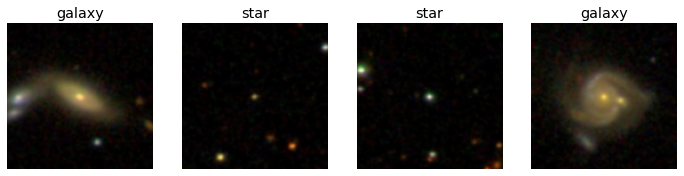

In [47]:
datlds.valid.show_batch(max_n=4, nrows=1)

#### **Learning in Progress**

In [49]:
Star_Galaxy_Classifier = cnn_learner(datlds, resnet18, metrics=error_rate)
Star_Galaxy_Classifier.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.290222,0.113529,0.030833,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.070556,0.041185,0.014167,00:38
1,0.025114,0.036819,0.005833,00:38
2,0.009015,0.026405,0.005833,00:38
3,0.006731,0.021287,0.005833,00:38


#### **Interpretation**

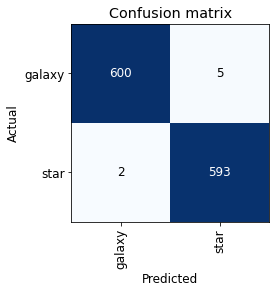

In [50]:
interp = ClassificationInterpretation.from_learner(Star_Galaxy_Classifier)
interp.plot_confusion_matrix()

#### **Predict**

In [51]:
for i in range(4):  
  download_url(galurls[5678+i*7],f'drive/MyDrive/Star_Galaxy_Classifier/Test/test{i+4}.jpg')
  print(Star_Galaxy_Classifier.predict('drive/MyDrive/Star_Galaxy_Classifier/Test/test{}.jpg'.format(i+4)))

('galaxy', tensor(0), tensor([1.0000e+00, 1.4166e-11]))


('galaxy', tensor(0), tensor([1.0000e+00, 2.1266e-11]))


('galaxy', tensor(0), tensor([1.0000e+00, 1.0186e-11]))


('galaxy', tensor(0), tensor([1.0000e+00, 5.8480e-08]))
